In [1]:
%load_ext wurlitzer
import glob
import os
from xspec import *
from stingray import Lightcurve
from astropy.io import fits
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12,8]
os.chdir('pps/')

Fit.statMethod = "chi"
Fit.nIterations = 100000
Fit.delta = 1e-4
Fit.criticalDelta = 1e-4

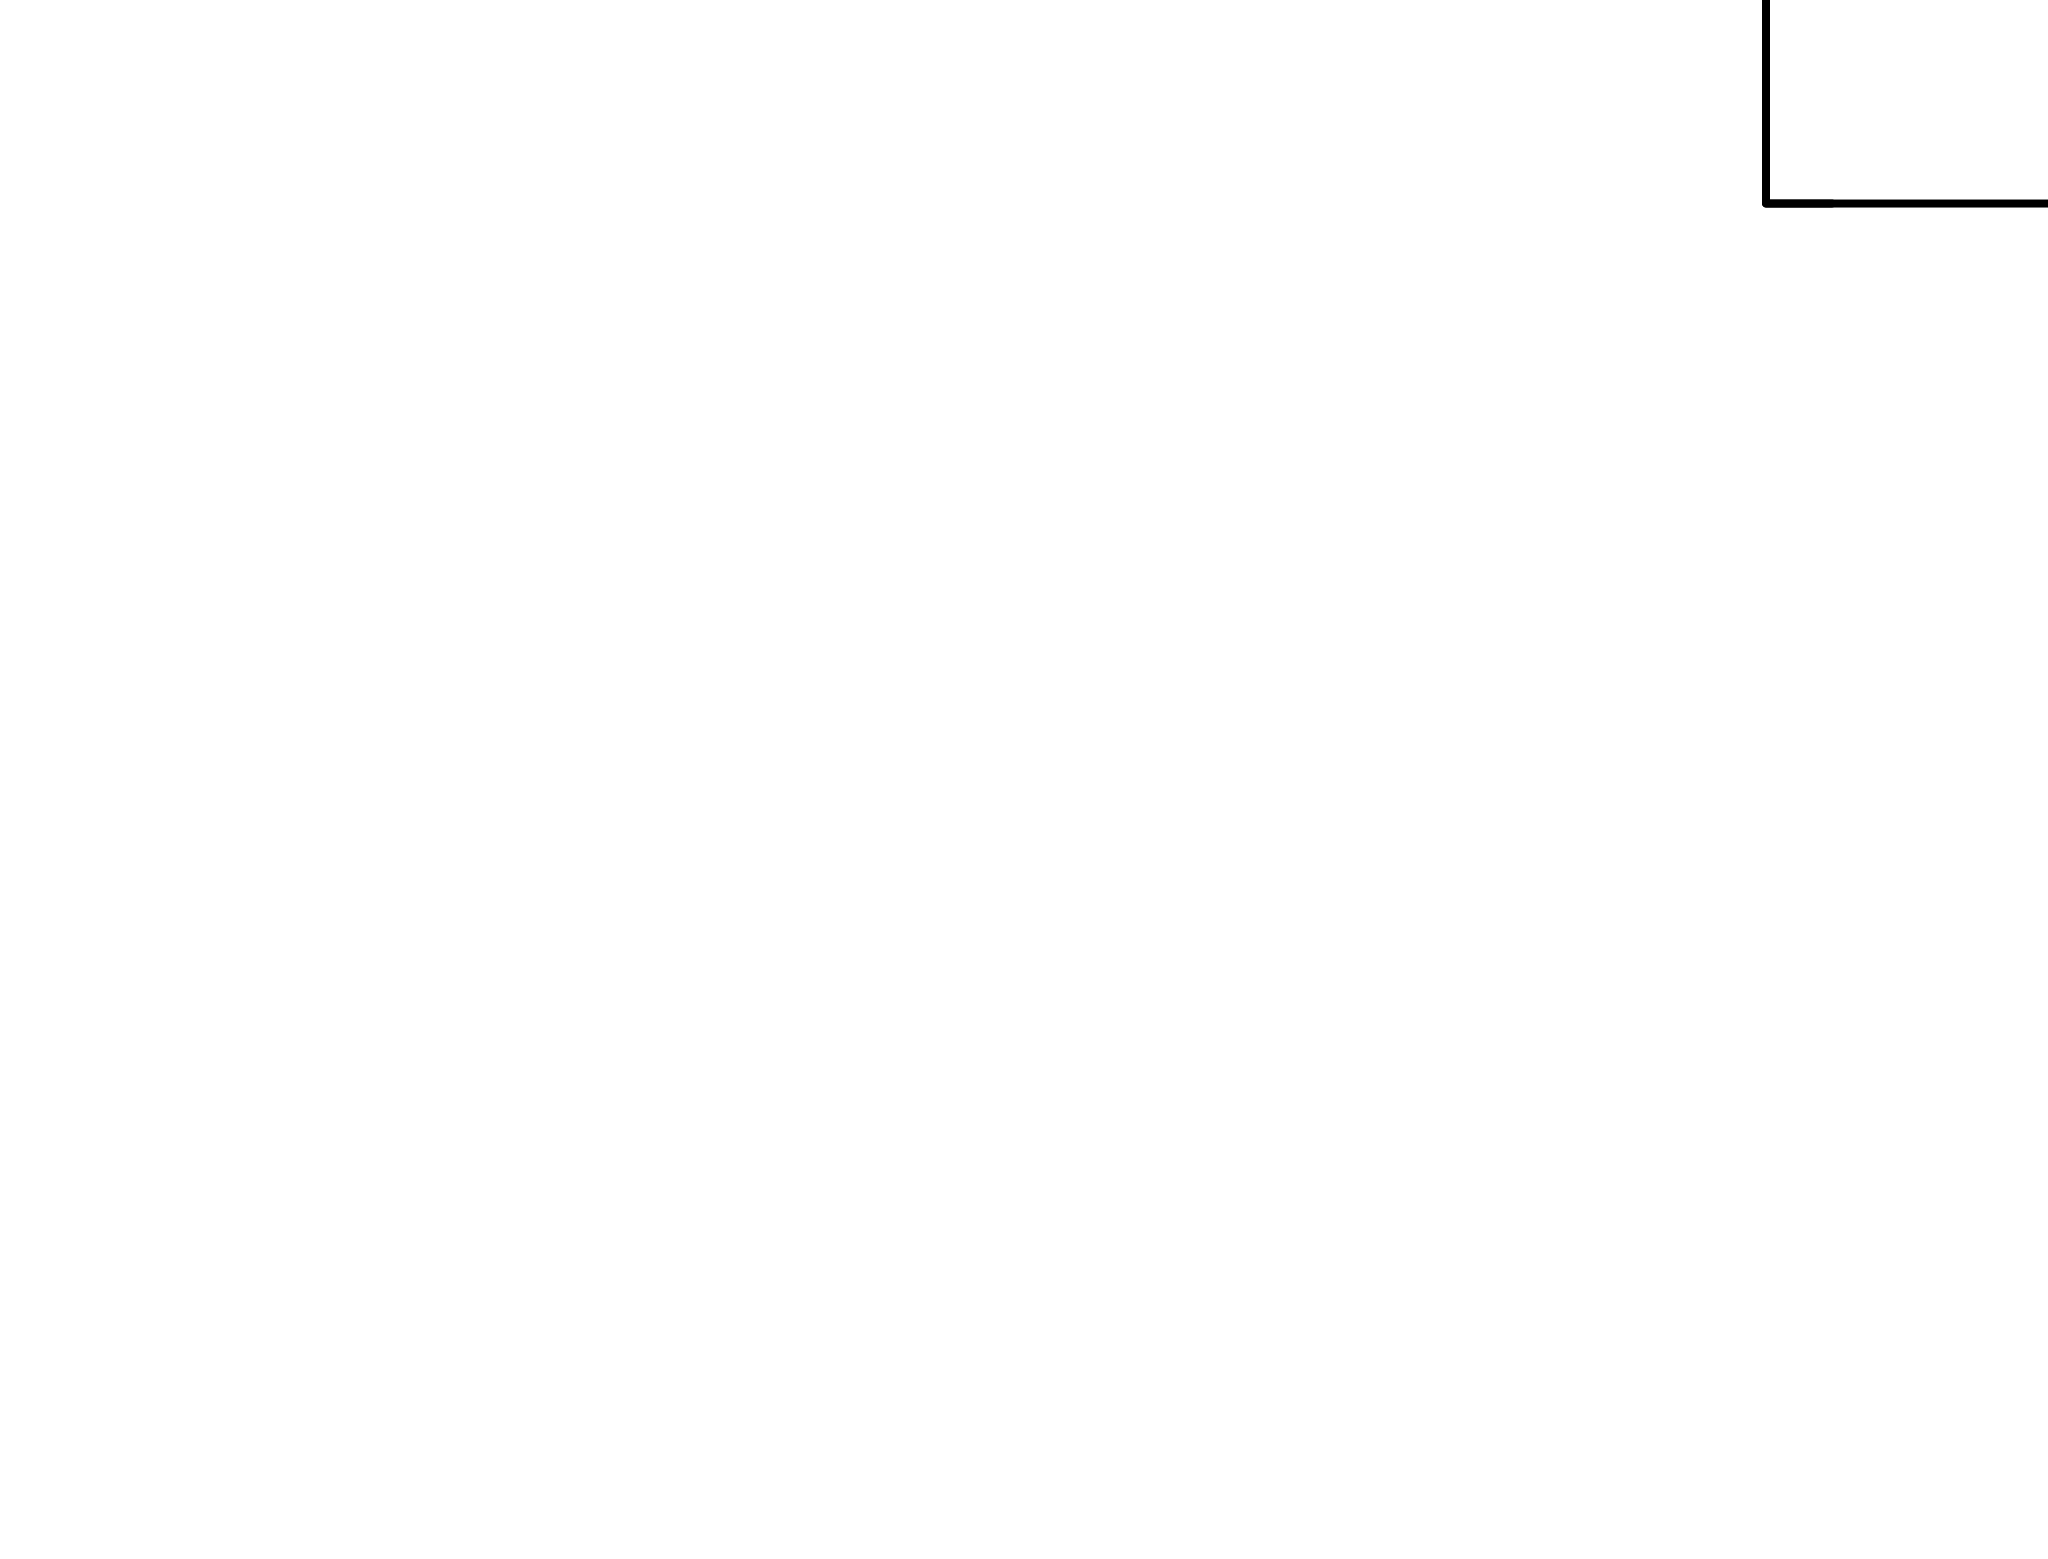


1 spectrum  in use
 
Spectral Data File: P0886040401PNS003SRSPEC0035.FTZ  Spectrum 1
Net count rate (cts/s) for Spectrum:1  4.169e-03 +/- 6.498e-04 (57.8 % total)
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-6
  Telescope: XMM Instrument: EPN  Channel Type: PI
  Exposure Time: 1.733e+04 sec
 Using fit statistic: chi
 Using Background File                P0886040401PNS003BGSPEC0035.FTZ
  Background Exposure Time: 1.733e+04 sec
 Using Response (RMF) File            epn_e3_ff20_sdY8.rmf for Source 1
 Using Auxiliary Response (ARF) File  P0886040401PNS003SRCARF0035.FTZ



In [2]:
spec_fnames = glob.glob('P*PNS*SRSPEC*.FTZ')

spec = Spectrum(spec_fnames[0])
Plot.device="/svg"
Plot.xAxis="keV"
Plot.xLog=True
Plot.yLog=True
Plot.addCommand("Rescale Y 0.00001 0.005")
Plot("data")

      No channels ignored (no channels in specified range)
     1 channels (6) ignored in spectrum #     1


Model TBabs<1>*bbody<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bbody      kT         keV      3.00000      +/-  0.0          
   3    2   bbody      norm                1.00000      +/-  0.0          
________________________________________________________________________

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner 

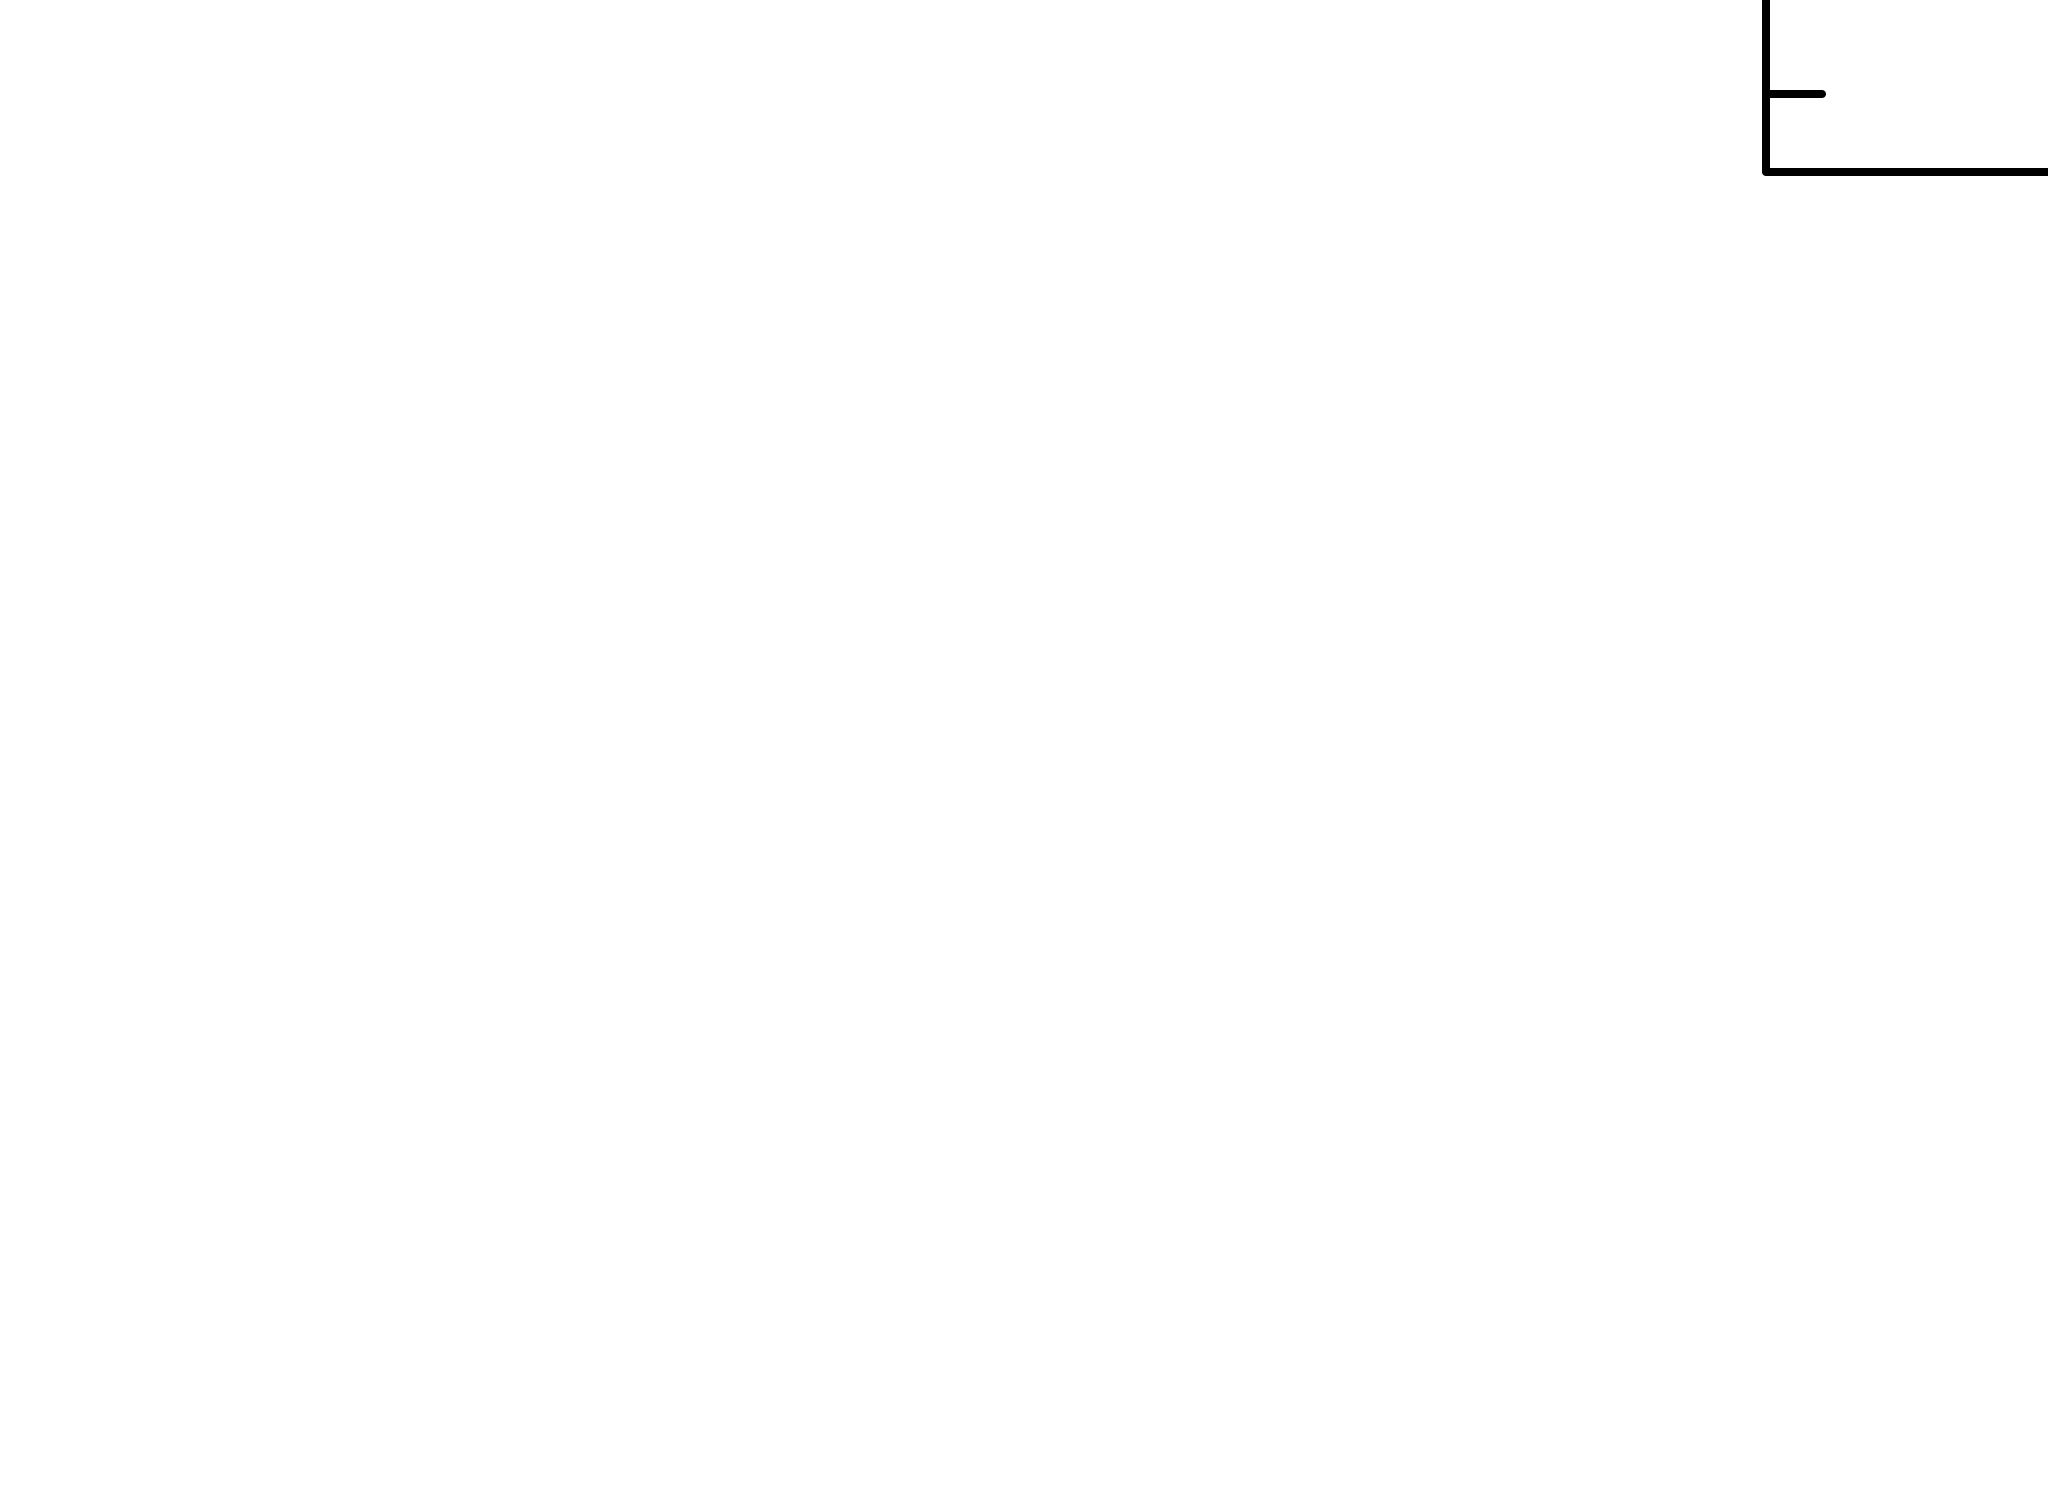

In [3]:
spec.ignore("**-0.2 12.0-**")
mo = Model("tbabs*bbody")
Fit.perform()
Plot("data resid")


Model TBabs<1>*bremss<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   bremss     kT         keV      7.00000      +/-  0.0          
   3    2   bremss     norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              2.217914e+11     using 5 bins.

Test statistic : Chi-Squared              2.217914e+11     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        3:norm
18.0272      2.65872      -1       1.45799       35.2059   7.55846e-06
2.38458      371703       -2       3.39279       199.171   3.01457e-05
1.06479      78327.1      -3       3.87526       199.326   4.62256e-05
0.7

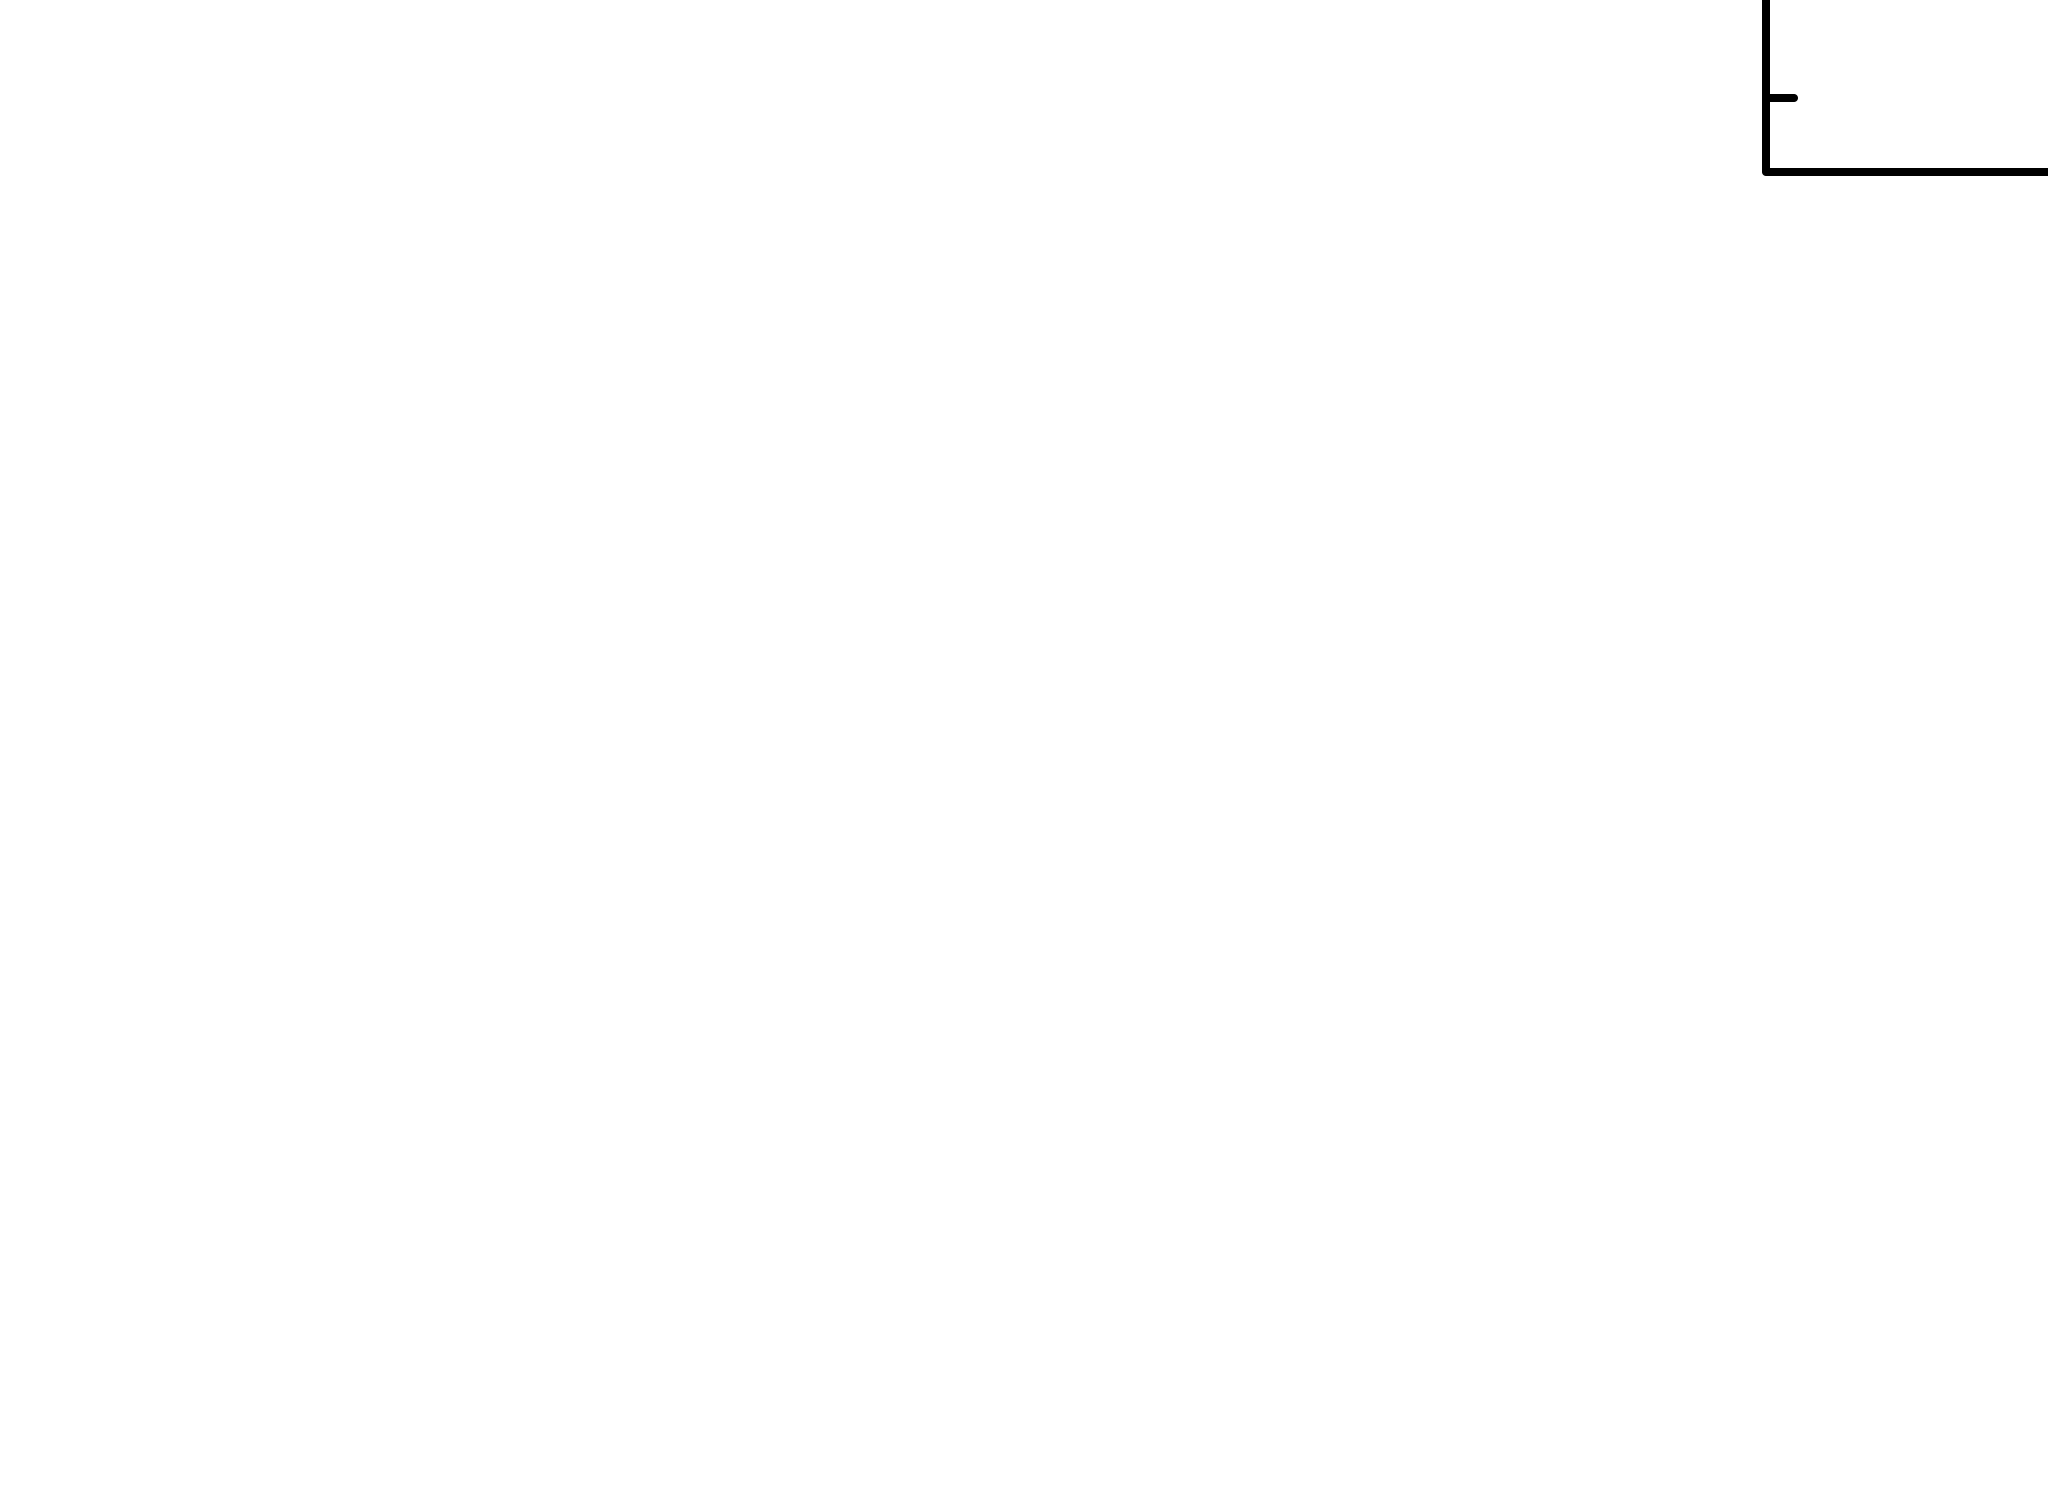

In [4]:
AllModels.clear()
mo = Model("tbabs*bremss")
Fit.perform()
Plot("data resid")


Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________

Reading APEC data from 3.0.9


Fit statistic  : Chi-Squared              8.150386e+10     using 5 bins.

Test statistic : Chi-Squared              8.150386e+10     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
39.7186      0.805444     -2      0.153883       17.7788   1.3

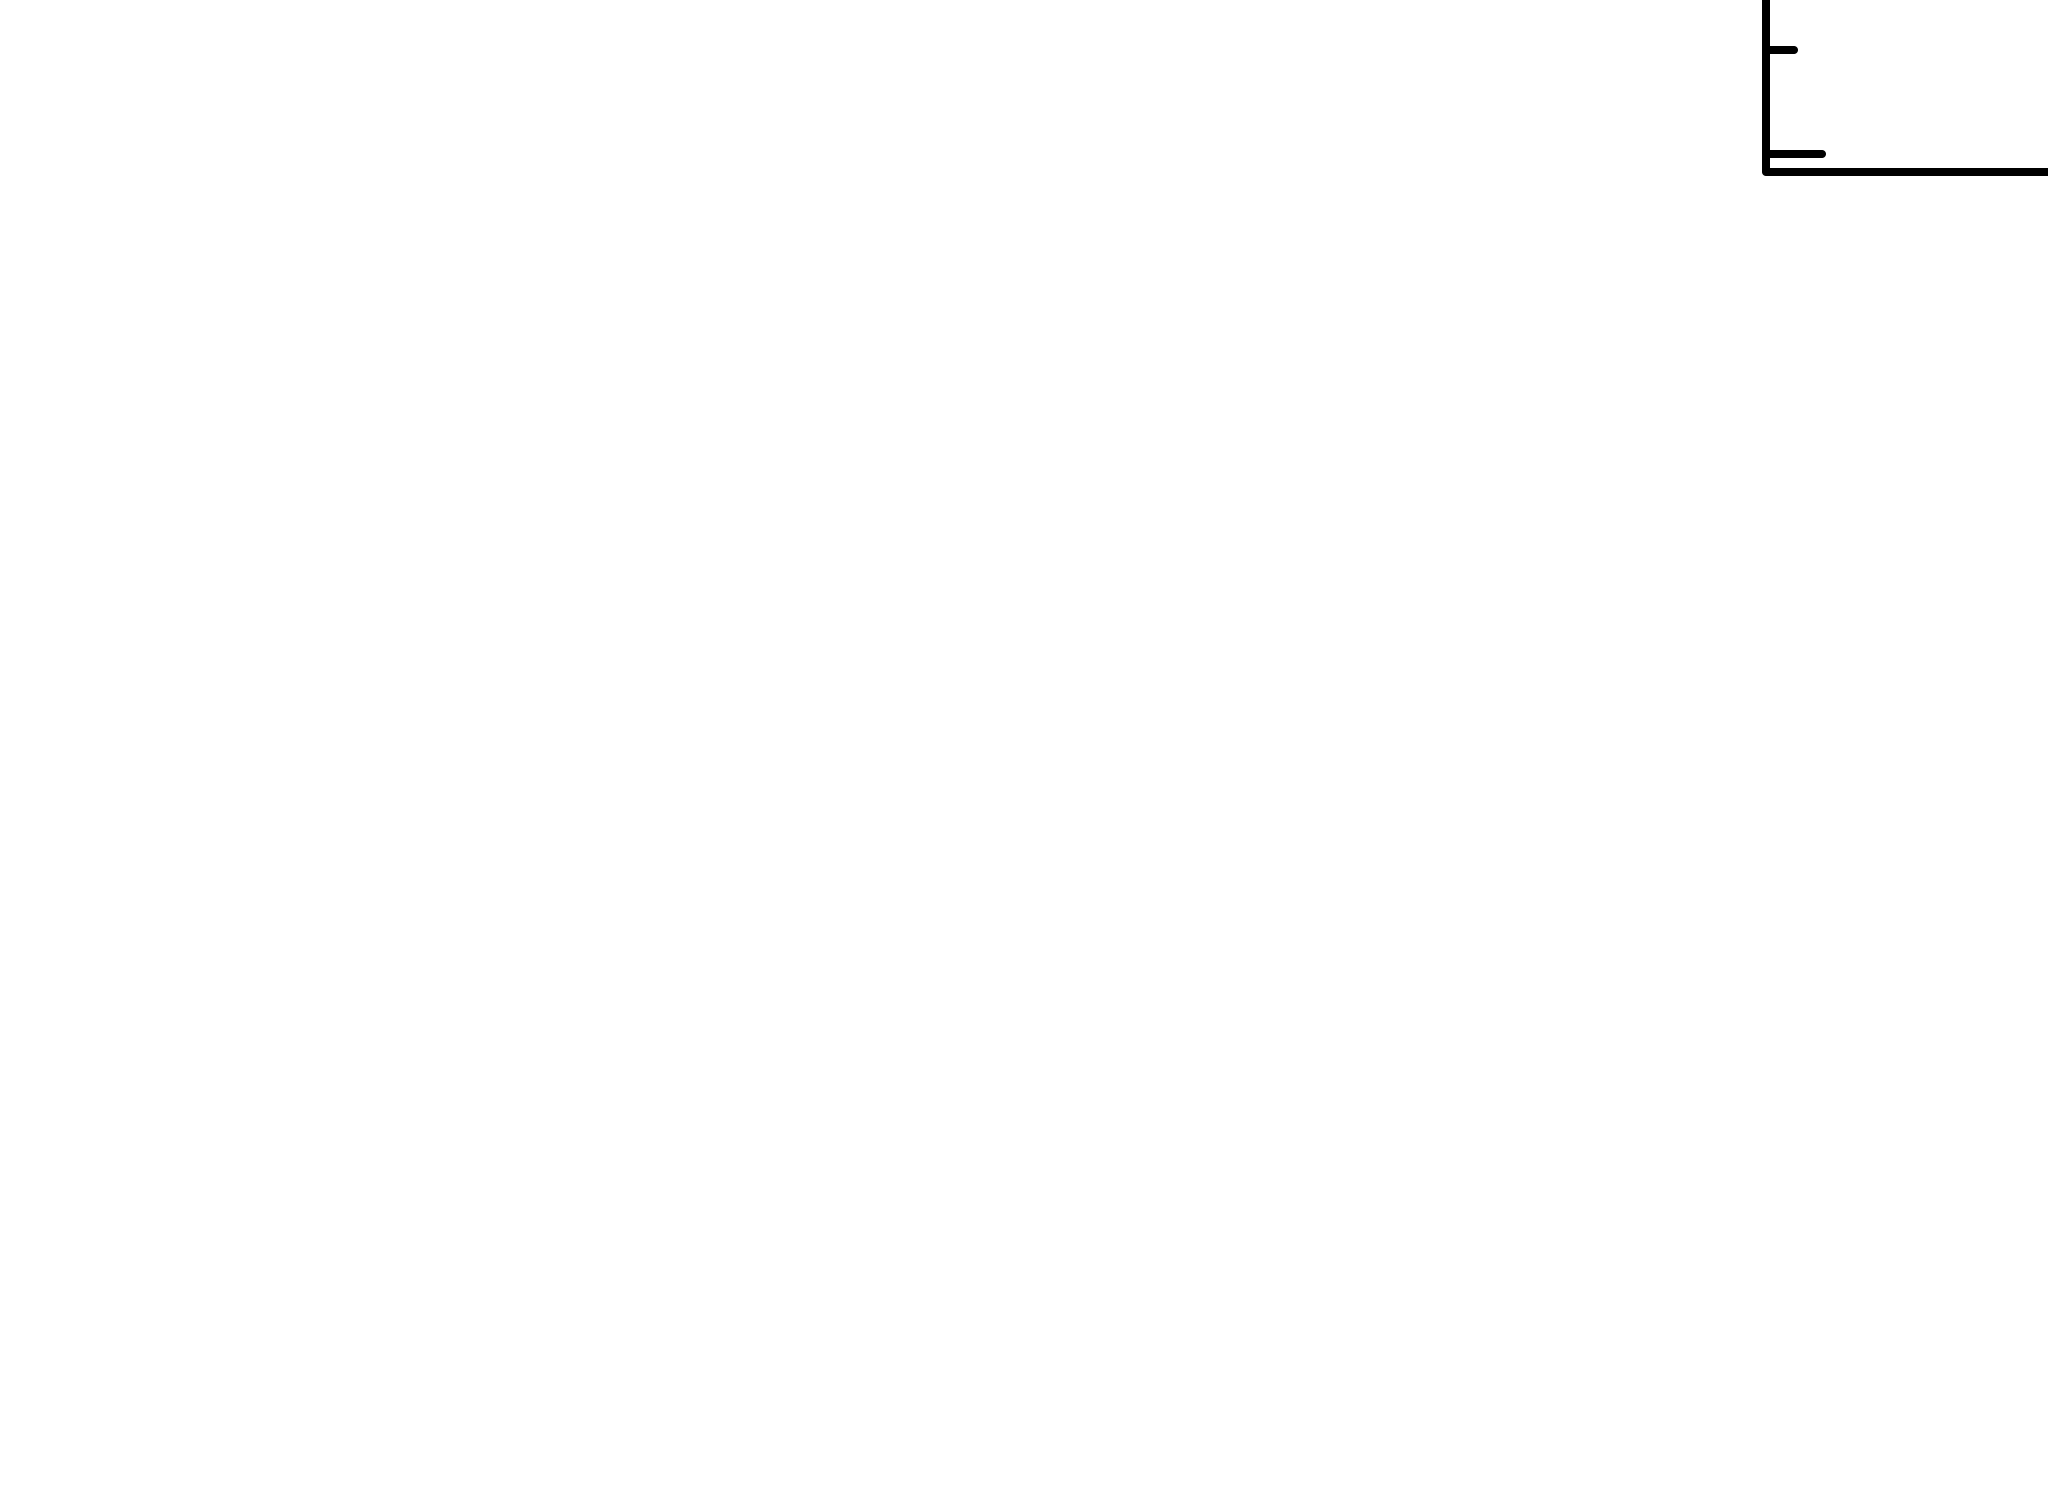

In [5]:
AllModels.clear()
mo = Model("tbabs*apec")
Fit.perform()
Plot("data resid")

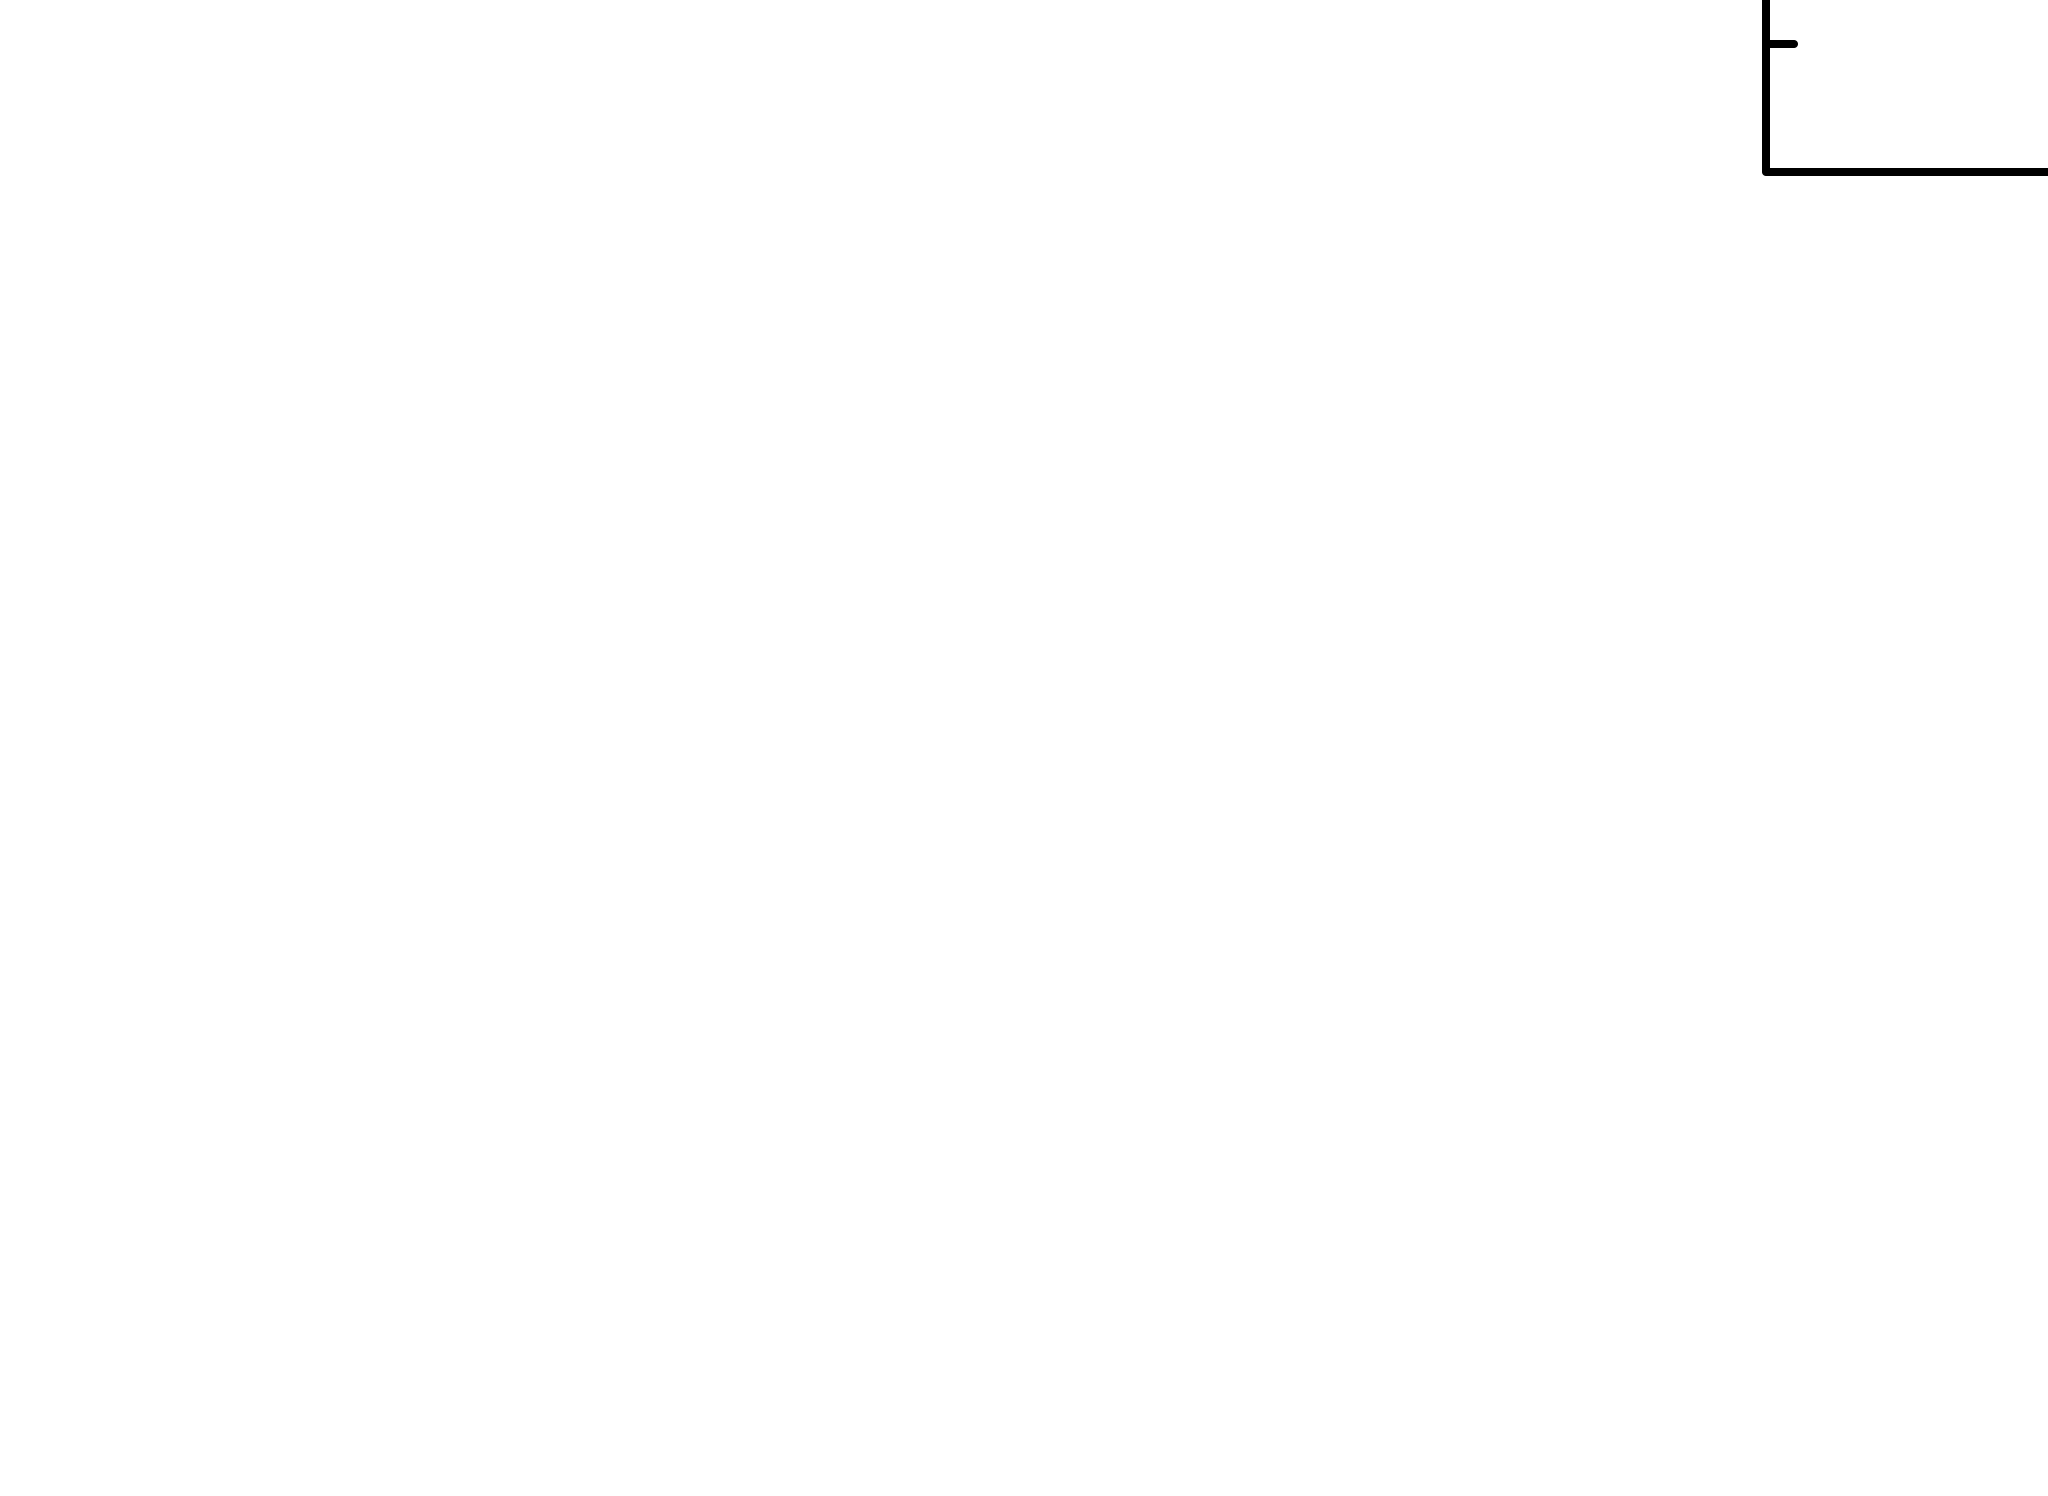


Model TBabs<1>*powerlaw<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              1.119367e+12     using 5 bins.

Test statistic : Chi-Squared              1.119367e+12     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm
1.03356      3.18881      -3       1.56526      0.341868   2.84052e-06
0.745066     328036       -2       2.36079      0.555316   4.17124e-06
0.430925     250101       -2       2.59572      0.686650   5.40262e-06
0

In [6]:
AllModels.clear()
mo = Model("tbabs*powerlaw")
Fit.perform()
Plot("data resid")

In [7]:
AllModels.calcFlux(".2 12.0")

 Model Flux 1.3227e-05 photons (1.2824e-13 ergs/cm^2/s) range (0.20000 - 12.000 keV)


In [8]:
#plx = 1.4843
d_kpc = 8
F_x = 1.2824*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

9.817139587956737e+32


In [9]:
F_opt = 1.05*10**-5 * 10**(-0.4*20.78)
print('Optical Flux: ',F_opt)
print('F_x / F_opt: ', F_x/F_opt)

Optical Flux:  5.119049146085544e-14
F_x / F_opt:  2.5051527410722967



Model TBabs<1>*apec<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   apec       kT         keV      1.00000      +/-  0.0          
   3    2   apec       Abundanc            1.00000      frozen
   4    2   apec       Redshift            0.0          frozen
   5    2   apec       norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              8.150386e+10     using 5 bins.

Test statistic : Chi-Squared              8.150386e+10     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.449784e+10     using 5 bins.

Test statistic : Chi-Squared              1.449784e+10     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees o

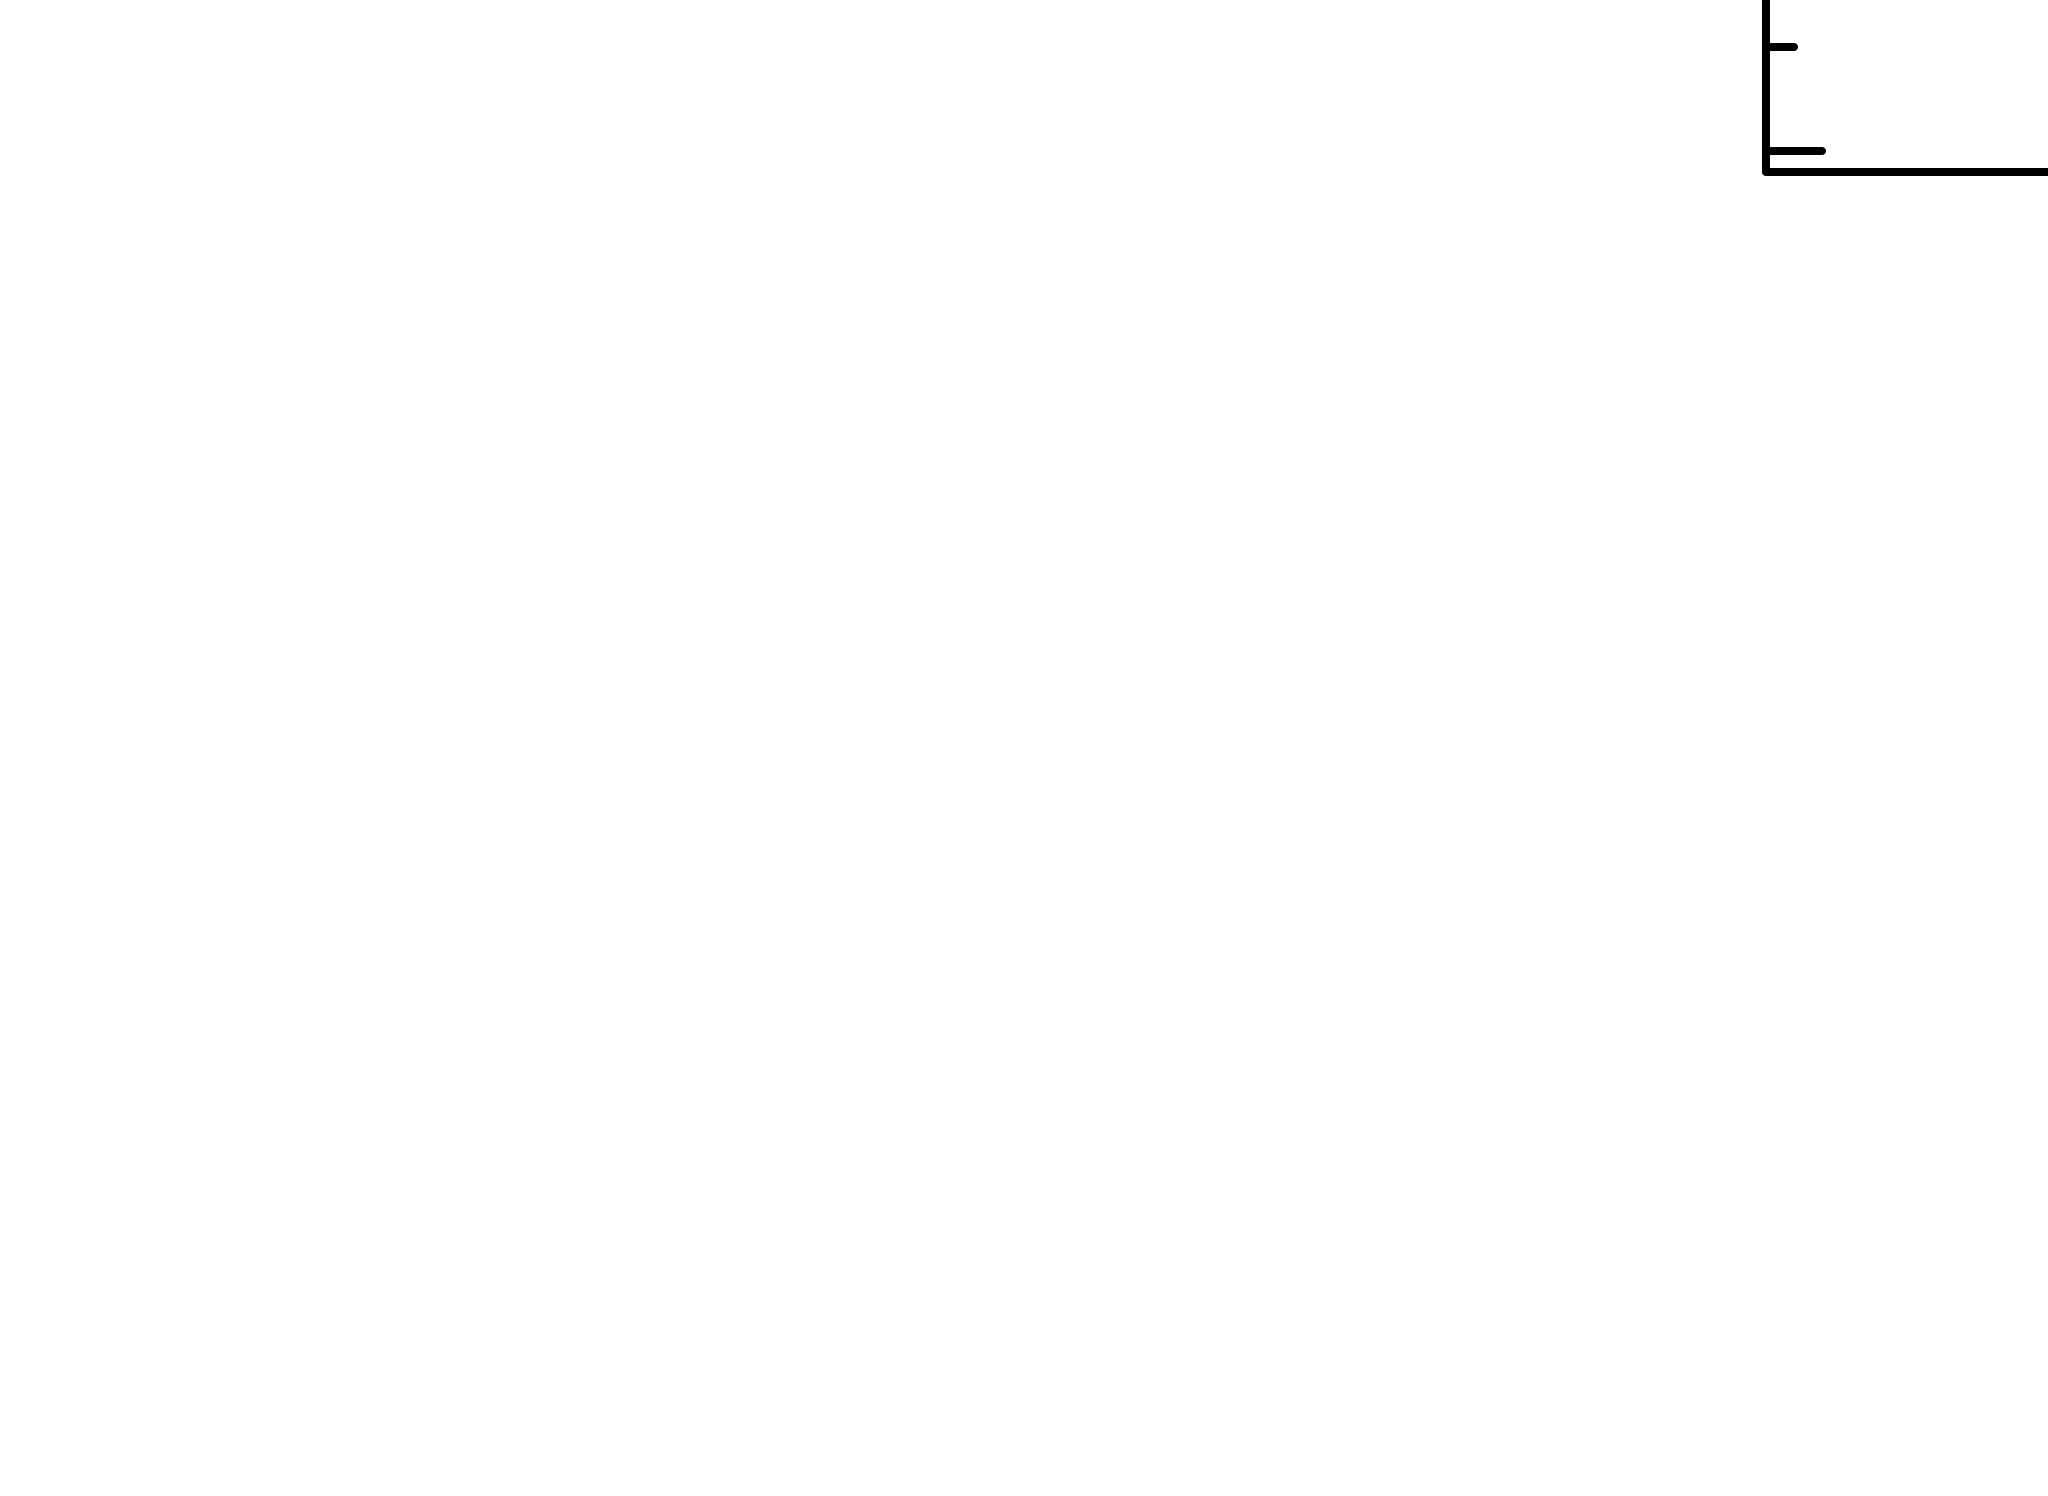

In [13]:
AllModels.clear()
mo = Model("tbabs*apec")
mo.apec.Abundanc = 0.3
Fit.perform()
Plot("data resid")


Model TBabs<1>*raymond<2> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   raymond    kT         keV      1.00000      +/-  0.0          
   3    2   raymond    Abundanc            1.00000      frozen
   4    2   raymond    Redshift            0.0          frozen
   5    2   raymond    norm                1.00000      +/-  0.0          
________________________________________________________________________


Fit statistic  : Chi-Squared              5.201401e+10     using 5 bins.

Test statistic : Chi-Squared              5.201401e+10     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degrees of freedom
 Current data and model not fit yet.

Fit statistic  : Chi-Squared              1.039524e+10     using 5 bins.

Test statistic : Chi-Squared              1.039524e+10     using 5 bins.
 Null hypothesis probability of 0.000000e+00 with 2 degree

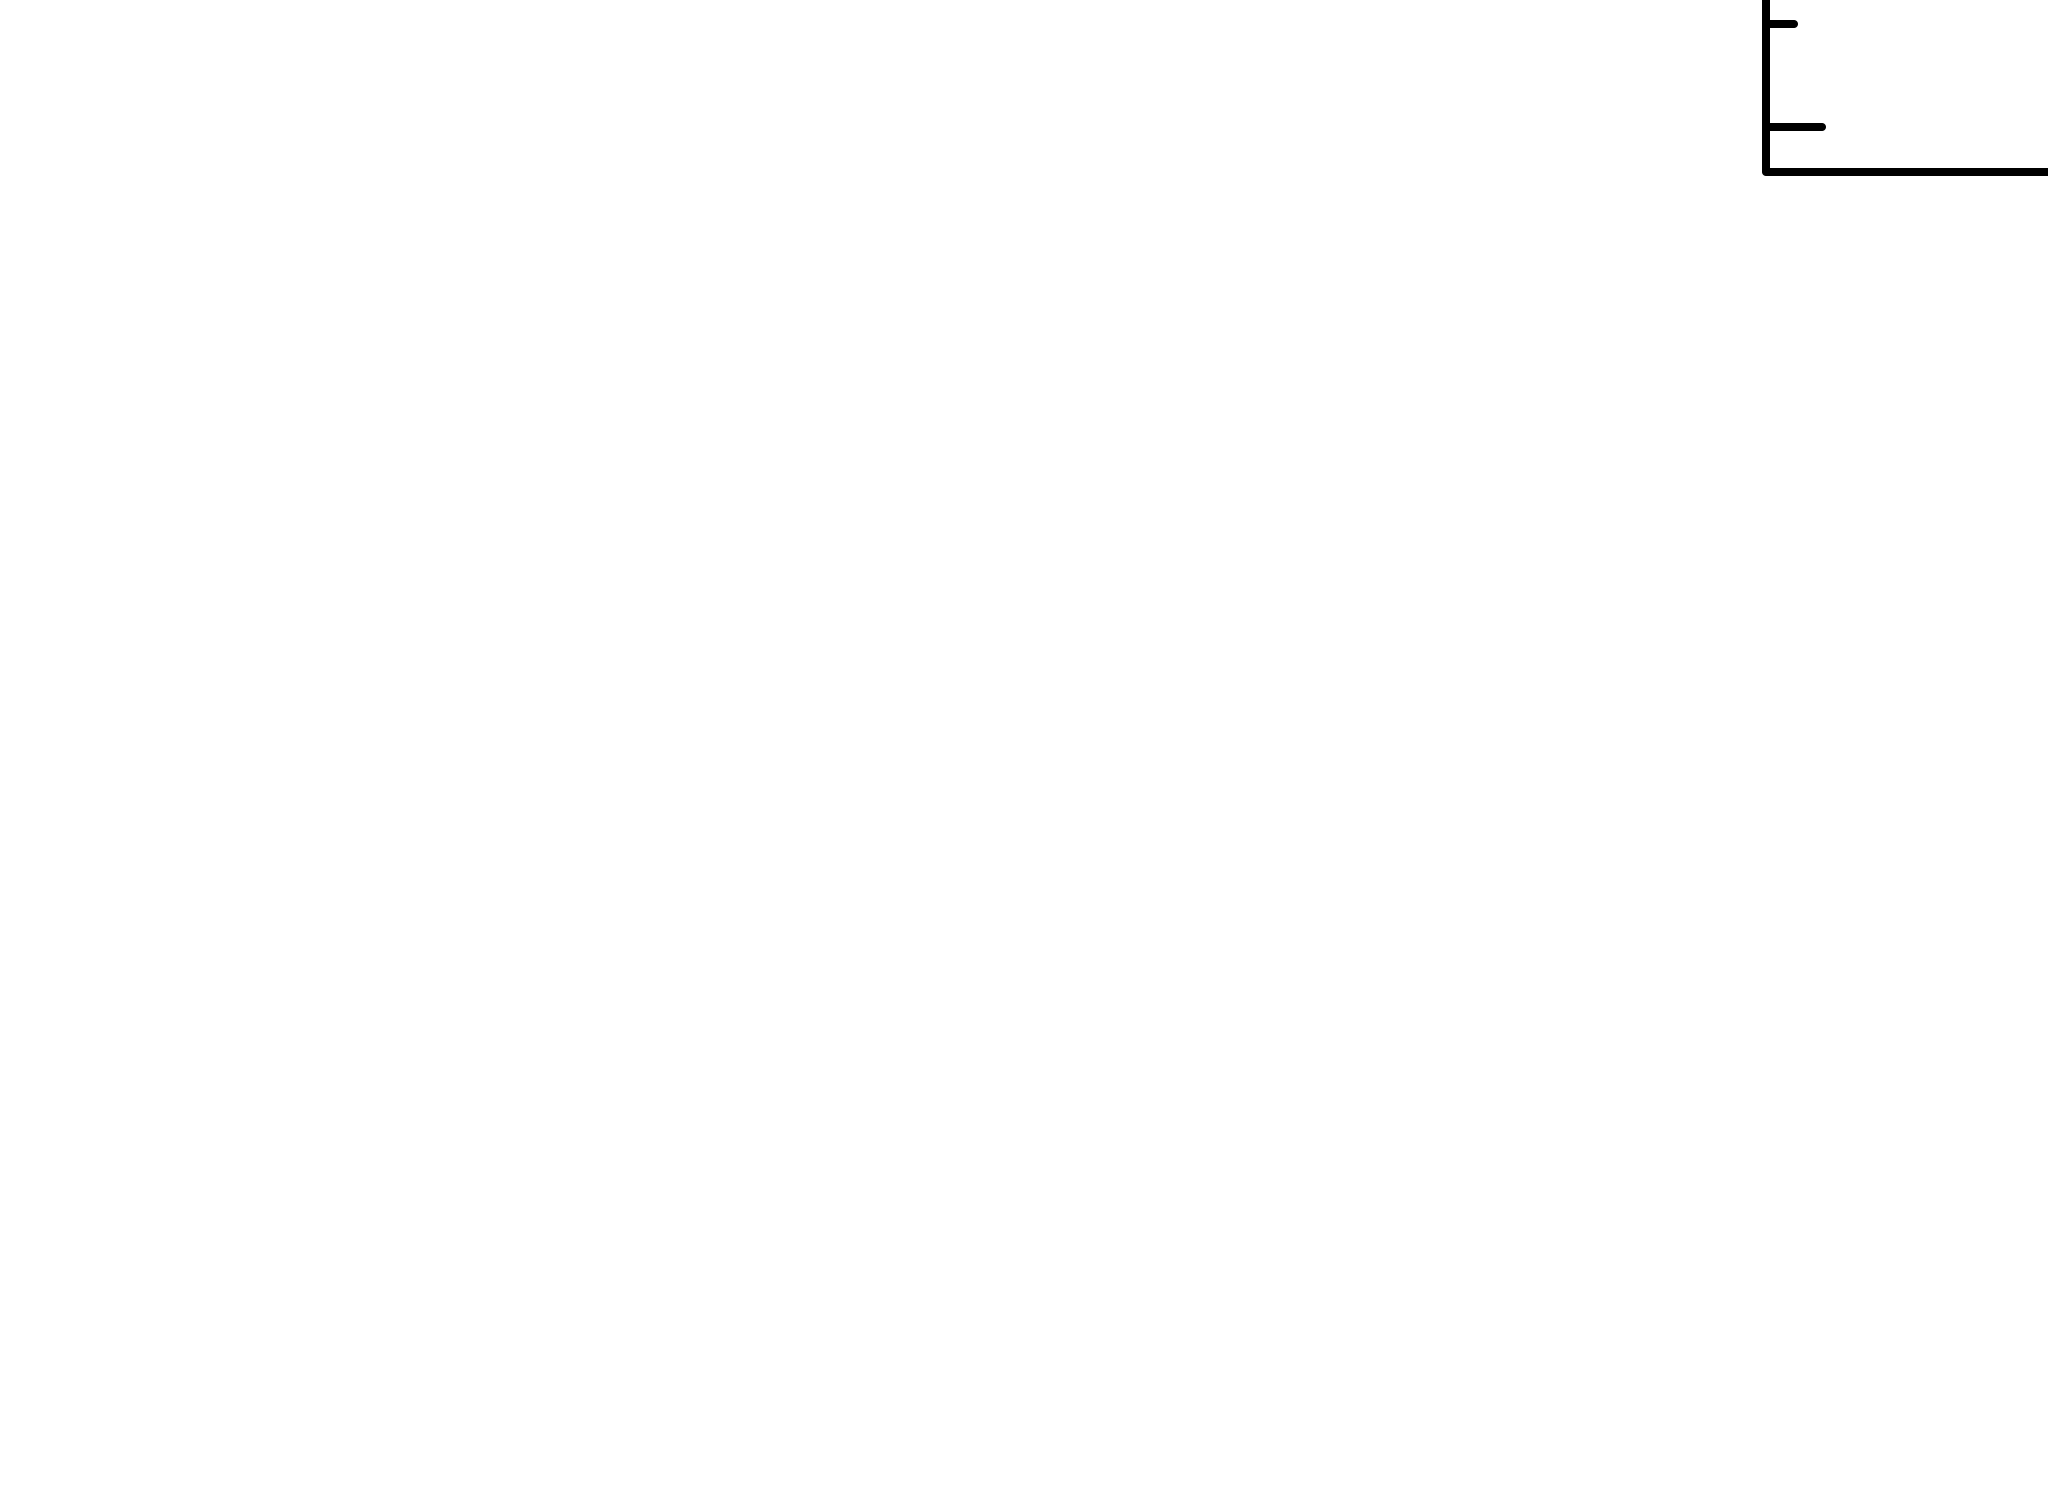

                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH          2:kT        5:norm
38.6858      1.51857      -3     0.0243308       18.7913   4.30660e-06
25.0035      78712.4      -2      0.580792       51.3904   3.87364e-05
9.41173      105767       -1       1.27596       62.2493   5.19039e-05
7.94691      1123.17      -2       2.41728       63.4281   0.000103631
3.53891      65849.9      -2       3.20866       63.9285   0.000109835
1.86264      40829.3      -2       3.68080       63.9783   0.000110566
1.667        27722.7      -2       3.82905       63.9912   0.000111688
0.703427     25805.4      -1       3.96867       63.9974   0.000105421
0.478306     13234.1      -1       4.01586       63.9989   0.000102491
0.415385     7977.95      -1       4.02767       63.9995   0.000101107
0.393831     5718.56      -1       4.03011       63.9998   0.000100448
0.385245     4701.95      -1       4.03052       63.9999   0.000100132
0.3815       4229.1       -1   

In [12]:
AllModels.clear()
mo = Model("tbabs*raymond")
mo.raymond.Abundanc = 0.3
Fit.perform()
Plot("data resid")

In [11]:
#plx = 1.4843
d_kpc = 1.4
F_x = 1.2824*10**-13

L_x = 4*3.14*F_x*(d_kpc*3.086*10**21)**2
print(L_x)

3.0064989988117495e+31
